# Red bipartita de usuarios y palabras
## Autor: Camilo Torres Botero
## Profesor: Sergio Pulido Tamayo 
Red bipartita de palabras obtenidas a partir de tweets, compuesta de dos tipos de nodos: palabras y usuarios. El objetivo de esta red es encontrar relaciones entre usuarios a partir de las palabras, dando peso a las palabras más usadas. Se esperan encontrar comunidades en las palabras que puedan clasificarse en tópicos, de los cuales se pueden sacar grupos de personas con gustos similares o temas comunes y afines. Los grupos obtenidos pueden generar interés en empresas que buscan clientes potenciales, lanzamientos de nuevos productos o segmentación del mercado.

## Limpieza de la base de datos
La base de datos se encuenta almacenada en MongoDB debido a que cada tweet está en formato json. A través de un script en python se realiza la conección a la base de datos con el fin de crear en un archivo de texto la red bipartita de usuarios y palabras. El script se encuentra en la carpeta del proyecto y se llama "get_network_data.py".

Dentro de la base de datos existe una colección llamada "tweets_users" que contiene los usuarios y por cada usuario las palabras que han usado en los tweets. Las palabras seleccionadas para cada usuario fueron sustantivos, adjetivos y emojis. Esto se realizó por medio de una herramienta de Standford llamada POS Tagger (Part-Of-Speech Tagger) con la cual se analizaba cada texto y se hacía la respectiva separación. Se puede ver información y documentación de la herramienta en el siguiente enlace: https://nlp.stanford.edu/software/tagger.shtml

Cada usuario puede usar una palabra o un emoji más de una vez lo cual se usa como el peso en los enlaces de la red, igualmente este peso es tenido en cuenta en le momento de realizar las proyecciones de la red.

A continuación se muestra un ejemplo de un registro de la colección "tweets_users":
<div class="alert alert-info" role="alert">
<small>
<pre> 
{
	"_id" : ObjectId("58e6c881a9f8a04c22c5a237"),
	"id" : "1070154709",
	"name" : "Daniela Fuentes✨",
	"text_emojis_nouns" : [
		"JAJAJAJJAJAJAJAJAJAJJAJAJJA",
		"❤",
		"mejor",
		"Feliz",
		"cumpleaños",
		"bendiciones",
		"😆",
		"💜",
		"💜",
		"✨",
		"✨",
		"día",
		"@villalobossebas",
		"❤",
		"Justo",
		"tantoo",
		"tengas",
		"lindo",
		"❤"
	],
	"emojis" : [
		"❤",
		"😆",
		"💜",
		"💜",
		"✨",
		"❤"
	],
	"text_types" : {
		"nouns" : [
			"JAJAJAJJAJAJAJAJAJAJJAJAJJA",
			"Feliz",
			"cumpleaños",
			"bendiciones",
			"día",
			"@villalobossebas"
		],
		"determiners" : [
			"El",
			"un"
		],
		"adjectives" : [
			"mejor",
			"✨",
			"Justo",
			"tantoo",
			"tengas",
			"lindo",
			"❤"
		],
		"prepositions" : [
			"de",
			"por",
			"de"
		],
		"pronouns" : [
			"todos",
			"❤",
			"esto",
			"te",
			"que"
		],
		"adverbs" : [
			"siempre",
			"@JoseGaleanoR"
		],
		"punctuation" : [
			",",
			",",
			",",
			","
		],
		"conjunctions" : [
			"cuando"
		],
		"verbs" : [
			"estoy",
			"apuntó",
			"dormir",
			"llega",
			"amo"
		]
	}
}
</pre>
</small>
</div>

Dentro del campo "text_emojis_nouns" se encuentran ya separados los sustantivos, adjetivos y emojis necesarios para armar la red. Como se puede ver en el json, hay palabras que deben ser limpiadas de los registros debido a que el POS tagger las clasificó como adjetivos o sustantivos de manera erronea. Por ejemplo los "jajaja" o algunos adverbios o verbos mal clasificados.

La limpieza de todos estos caracteres ruidosos para la red se realizó en varias fases:

El primer paso es hacer una limpieza en el momento de la creación del archivo de texto con los enlaces, es decir, en el archivo "get_network_data.py" remover la mayor cantidad de palabras ruidosas que se pueda. Para esto se usó un libería de python llamada "Natural Language Toolkit" (NLTK) con la cual se pueden hacer diferentes procesamientos para trabajar con lenguaje natural en python. Entre estos procesos está la detección de stopwords o palabras de parada que comunmente son preposiciones o conectores. Además de remover las palabras de parada, se quitaron también las palabras que comenzaban por '@' debido a que son usuarios mencionados en tweets y que fueron clasificados como sustantivos o adjetivos. Se puede obtener información de la librería NLTK en el siguiente enlace: http://www.nltk.org/

El segundo paso de la limpieza fue crear una red con NetworkX utilizando el archivo entregado por el paso anterior. A partir de esta red se creó la proyección de palabras y se analizó cada una de ellas organizadas por grado de mayor a menor. Con este proceso se encontraron palabras y caracteres que eran ruidosos para la red. Este fue un proceso manual y dió como resultado dos arreglos, uno de palabras y otro de caracteres a remover. A continuación se muestran los arreglos obtenidos:

remove_words: ['vez', 'día', 'cosas', 'dia', 'asi', '🏻', 'días', 'parte', 'man', 'fin', 'necesito', 'aqui', 'ser', 'pra', '🏼', 'sera', 'hey', 'fav', "'ll", 'aja', 'qlo', 'sdds', 'dejaste', 'sas', 'fiz', 'dan', 'heauheauehae', 'lok', 'ami', 'hablando', 'jfghdf', 'dfkjgd', '12am', "'re", 'aya', 'u.u', '🏽', '▪', '#jct', 'jasldjaslñfjasdñlasjfasd', '2016/6/25', 'xxi', 'ehh', 'aww', 'comí', 'mrc', 'prrrra', 'aksjsks', 'háblame', 'rts', '・', 'pasatela', 'hahsahsa', 'años', 'tweets', 'twitter', 'twitiir', 'twittera', '#twitteroff', 'retwits', '#twitter', '#cd', 'twiter', 'twits', 'twitt', 'twitero', 'tweetdeck', 'retweet', 'twets', 'coisas', 'delosmismoscreadoresdeperreopagomelo', 'yo-yo-yo']

remove_chars: ['jaja', 'jeje', 'kkk', 'haha', 'aaa', 'eee', 'ooo', 'iii', 'yyy', 'uff', 'ddd', 'jiji', 'zzz', 'sss', 'rrr', 'uuu', '???', 'nnn']

Por último se volvió a correr el script "get_network_data.py" agregando los arreglos obtenidos en el punto anterior y validando en la creación de los enlaces que la palabra correspondiente no se econtrara dentro del arreglo "remove_words" o que no contuviera alguna de las cadenas de caracteres del arreglo "remove_chars". Los pasos mencionados en esta limpieza se pueden observar en el script contenido en la carpeta del proyecto. 

Con esta limpieza se borraron en total 8332 palabras ruidosas para la red. 

El resultado de este proceso es un archivo de texto llamado "edges_file_total_network_weights_undirected.txt" a partir del cual se puede crear la red en python y el cual también puede ser utilizado para graficar la red en bipartita completa en gephi. 

In [15]:
# Librerías necesarias para correr el proyecto
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator
import community
from scipy.stats import powerlaw
%matplotlib inline
sns.set()

## Número de nodos y enlaces

In [32]:
"""
En el arreglo all_edges se guardan los enlaces de la red con pesos. El arreglo all_edges_aux sirve para contar 
el número de veces que aparece un enlace y así agregarlo como peso del enlace en all_edges
"""
all_edges = []
all_edges_aux = []
# Archivo de texto que contiene los enlaces de la red (Se encuenta en la carpeta del proyecto)
with open('edges_file_total_network_weights_undirected_4.txt', encoding="utf8") as f:
    next(f)
    for line in f:
        edge = line.replace('\n', '').split('\t')
        # Condicional para validar si ya existe un enlace y agregarlo como peso
        if (edge[0],edge[1]) in all_edges_aux:
            edge_index = all_edges_aux.index((edge[0],edge[1]))
            all_edges[edge_index] = (edge[0], edge[1], all_edges[edge_index][2] + 1)
        else:        
            all_edges.append((edge[0], edge[1],1))
            all_edges_aux.append((edge[0], edge[1]))

total_count_edges = len(all_edges)
all_nodes = set()
users_nodes = set()
words_nodes = set()

for x,y,w in all_edges:
    users_nodes.add(x)
    words_nodes.add(y)
    all_nodes.add(x)
    all_nodes.add(y)
 
print("El tamaño de la red está definido por los siguientes valores:")
print("Total de enlaces:", len(all_edges))
print("Total de nodos:", len(all_nodes))
print("Total de nodos usuario:", len(users_nodes))
print("Total de nodos de palabras:", len(words_nodes))

El tamaño de la red está definido por los siguientes valores:
Total de enlaces: 25713
Total de nodos: 13574
Total de nodos usuario: 2947
Total de nodos de palabras: 10627


## Proyecciones

In [4]:
projection_users = set()
projection_words = set()
for word in words_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if word in edge:
            possible_nodes.add(edge[0])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_users and (node2,node1) not in projection_users:
                projection_users.add((node1,node2)) if (node1 != node2) else 0
                
for user in users_nodes:
    possible_nodes = set()
    for edge in all_edges:
        if user in edge:
            possible_nodes.add(edge[1])
    for node1 in possible_nodes:
        for node2 in possible_nodes:
            if (node1,node2) not in projection_words and (node2,node1) not in projection_words:
                projection_words.add((node1,node2)) if (node1 != node2) else 0
                
print("Proyeccion usuarios total enlaces:",len(projection_users))
print("Proyeccion palabras total enlaces:",len(projection_words))

Paso por aqui
Proyeccion usuarios total enlaces: 233229
Proyeccion palabras total enlaces: 368074


## Proyecciones usando NetworkX

In [3]:
tweets_users_words_graph = nx.Graph()
tweets_users_words_graph.add_nodes_from(users_nodes, bipartite=0)
tweets_users_words_graph.add_nodes_from(words_nodes, bipartite=1)
tweets_users_words_graph.add_weighted_edges_from(all_edges)

def my_weight(G, u, v, weight='weight'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G.edge[u][nbr].get(weight, 1) + G.edge[v][nbr].get(weight, 1)
    return w

projected_graph_users = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, users_nodes, weight_function=my_weight)
projected_graph_words = bipartite.generic_weighted_projected_graph(tweets_users_words_graph, words_nodes, weight_function=my_weight)

print("Proyeccion grafo usuarios total enlaces:",projected_graph_users.edges(data=True)[0:10])
print("Proyeccion grafo palabras total enlaces:",projected_graph_words.edges(data=True)[0:10])
print("Proyeccion grafo usuarios total enlaces:",len(projected_graph_users.edges()))
print("Proyeccion grafo palabras total enlaces:",len(projected_graph_words.edges()))

# network_edges_file = open("file_name_test2.txt", 'w', encoding="utf8")
# print('Source\tTarget\tType', file=network_edges_file)
# for k in projected_graph_words.edges(data=True):
#     print(k, file=network_edges_file)
    

Proyeccion grafo usuarios total enlaces: [('741521281', '4860690358', {'weight': 2}), ('741521281', '287729845', {'weight': 2}), ('741521281', '702983386198110209', {'weight': 2}), ('741521281', '3398157268', {'weight': 2}), ('741521281', '237510321', {'weight': 2}), ('741521281', '2872093200', {'weight': 2}), ('741521281', '1218805825', {'weight': 2}), ('741521281', '1098227526', {'weight': 2}), ('741521281', '572643946', {'weight': 2}), ('741521281', '83158652', {'weight': 2})]
Proyeccion grafo palabras total enlaces: [('verificadores', 'tal', {'weight': 2}), ('verificadores', 'criminal', {'weight': 2}), ('verificadores', 'salidas', {'weight': 2}), ('verificadores', 'gobierno', {'weight': 2}), ('verificadores', 'destrucción', {'weight': 3}), ('verificadores', 'apocalíptico', {'weight': 2}), ('verificadores', 'celac', {'weight': 2}), ('verificadores', 'aberrante', {'weight': 2}), ('verificadores', 'solo', {'weight': 2}), ('verificadores', 'servicio', {'weight': 2})]
Proyeccion grafo u

## Distribución de grados para la red bipartita completa

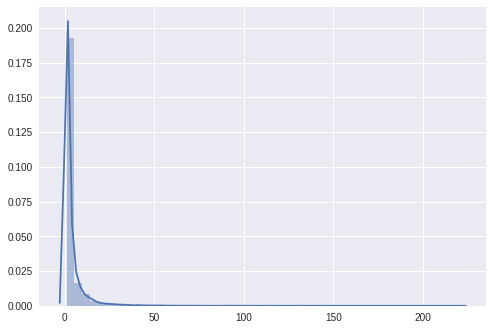

In [4]:
degrees_tweets_users_words_graph = list(tweets_users_words_graph.degree().values())
sns.distplot(degrees_tweets_users_words_graph)

## Distribución de grados para la red proyectada de usuarios

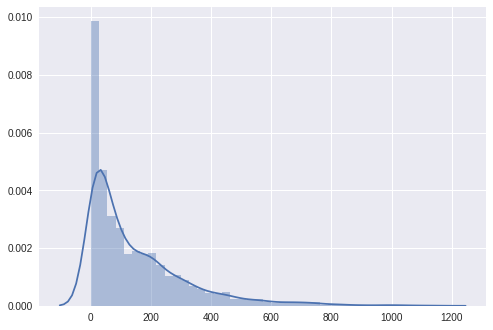

In [5]:
degrees_projected_graph_users = list(projected_graph_users.degree().values())
degrees_projected_graph_users = np.array(degrees_projected_graph_users)
degrees_projected_graph_users = degrees_projected_graph_users[np.nonzero(degrees_projected_graph_users)]
sns.distplot(degrees_projected_graph_users)

## Distribución de grados para la red proyectada de palabras

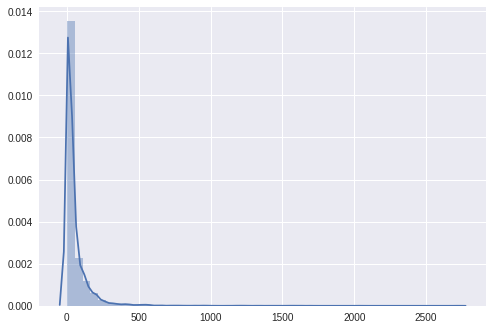

In [6]:
degrees_projected_graph_words = list(projected_graph_words.degree().values())
degrees_projected_graph_words = np.array(degrees_projected_graph_words)
degrees_projected_graph_words = degrees_projected_graph_words[np.nonzero(degrees_projected_graph_words)]
sns.distplot(degrees_projected_graph_words)

## Power Law Distribution para la red bipartita completa (Log)

(0.21386388445702345, 0.99999999999999989, 334.61121911679282)

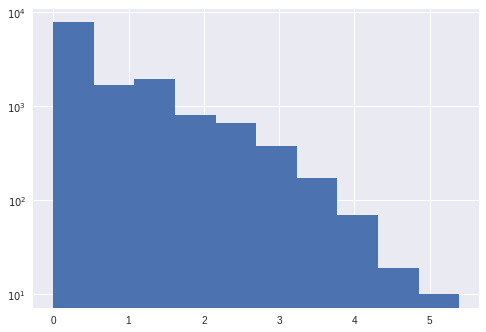

In [7]:
logs_tweets_users_words_graph = np.log(degrees_tweets_users_words_graph)
plt.hist(logs_tweets_users_words_graph, log=True)

e, l, s = powerlaw.fit(degrees_tweets_users_words_graph)
e, l, s

## Power Law Distribution para la red proyectada de usuarios (Log)

(0.27320087878796206, 0.99999999999999978, 1165.5626476640819)

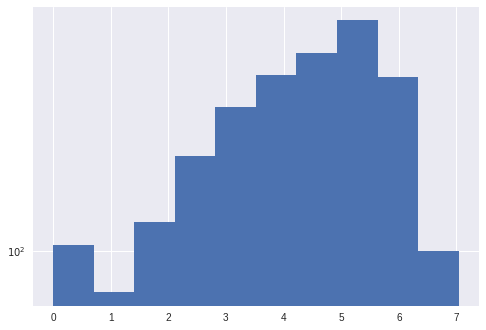

In [10]:
logs_projected_graph_users = np.log(degrees_projected_graph_users)
plt.hist(logs_projected_graph_users, log=True)

e_users, l_users, s_users = powerlaw.fit(degrees_projected_graph_users)
e_users, l_users, s_users

## Power Law Distribution para la red proyectada de palabras (Log)

(0.43093627551583291, 0.99999999999999989, 3257.1023645504861)

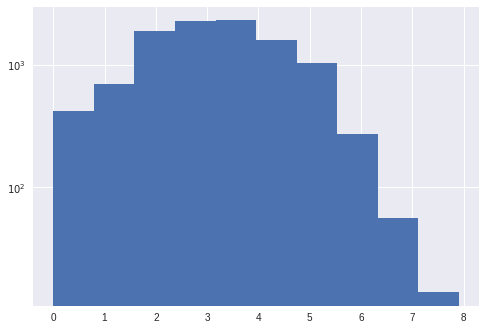

In [11]:
logs_projected_graph_words = np.log(degrees_projected_graph_words)
plt.hist(logs_projected_graph_words, log=True)

e_words, l_words, s_words = powerlaw.fit(degrees_projected_graph_words)
e_words, l_words, s_words

## Average path length de la red de palabras y usuarios y proyecciones

In [13]:
tweets_users_words_components = sorted(nx.connected_component_subgraphs(tweets_users_words_graph), key = len, reverse=True)
giant_component = tweets_users_words_components[0]
giant_component_edges = giant_component.edges()
degrees_giant_component = sorted(giant_component.degree().items(), key=operator.itemgetter(1), 
                                           reverse=True)[0:10]
degree_centrality_giant_component = sorted(nx.degree_centrality(giant_component).items(), key=operator.itemgetter(1), 
                                           reverse=True)[0:10]
print(degrees_giant_component)
print()
print(degree_centrality_giant_component)
print()
print(len(giant_component.nodes()))
print()
print("giant_component edges:",giant_component.edges(data=True)[0:10])
print()
# giant_component_diameter = nx.diameter(giant_component) #= 13
# giant_component_avg_shortest_path = nx.average_shortest_path_length(giant_component, weight='weight')
print("Componentes de la red de palabras y usuarios:",len(tweets_users_words_components))
print("Enlaces del componente gigante de la red de usuarios y palabras:", len(giant_component_edges))
# print("Diametro del componente gigante de la red de usuarios y palabras:", giant_component_diameter)
# print("Avg shortest path del componente gigante de la red de usuarios y palabras:", giant_component_avg_shortest_path)
print(" ")

# giant_component_edges_file = open('giant_component_edges_file.txt', 'w')
# print('Source\tTarget\tType', file=giant_component_edges_file)
# for k, v in sorted(giant_component_edges):
#     print(k+'\t'+v+'\tUndirected', file=giant_component_edges_file)
    

# print(nx.average_shortest_path_length(giant_component)) = 5.098959450209508
# for component in tweets_users_words_components:
#     print(len(component))

projected_graph_users_components = sorted(nx.connected_component_subgraphs(projected_graph_users), key = len, reverse=True)
print("Componentes de la proyección de usuarios:", len(projected_graph_users_components))
giant_component_users = projected_graph_users_components[0]
giant_component_users_edges = giant_component_users.edges()
# giant_component_users_avg_shortest_path = nx.average_shortest_path_length(giant_component_users, weight='weight')
# giant_component_users_diameter = nx.diameter(giant_component_users)
print("Enlaces del componente gigante de la red de usuarios:", len(giant_component_users_edges))
# print("Diametro del componente gigante de la red de usuarios:", giant_component_users_diameter)
# print("Avg shortest path del componente gigante de la red de usuarios:", giant_component_users_avg_shortest_path)
print(" ")


projected_graph_words_components = sorted(nx.connected_component_subgraphs(projected_graph_words), key = len, reverse=True)
print("Componentes de la proyección de palabras:", len(projected_graph_words_components))
giant_component_words = projected_graph_words_components[0]
giant_component_words_edges = giant_component_words.edges()

degrees_giant_component_words = sorted(giant_component_words.degree().items(), key=operator.itemgetter(1), reverse=True)
print("giant_component_words:",degrees_giant_component_words[0:10])
print(len(degrees_giant_component_words))
print(len(giant_component_words.nodes()))
# network_edges_file = open("file_name_test5.txt", 'w', encoding="utf8")
# # print('Source\tTarget\tType', file=network_edges_file)
# for k in degrees_giant_component_words:
#     print(k, file=network_edges_file)

# giant_component_words_avg_shortest_path = nx.average_shortest_path_length(giant_component_words, weight='weight')
# giant_component_words_diameter = nx.diameter(giant_component_words)
print("Enlaces del componente gigante de la red de palabras:", len(giant_component_words_edges))
# print("Diametro del componente gigante de la red de palabras:", giant_component_words_diameter)
# print("Avg shortest path del componente gigante de la red de palabras:", giant_component_words_avg_shortest_path)

[('vida', 220), ('😂', 200), ('2696424289', 196), ('😍', 187), ('amor', 155), ('❤', 144), ('2939078896', 137), ('2835601896', 135), ('1470922604', 132), ('1218805825', 129)]

[('vida', 0.01666287964856472), ('😂', 0.015148072407786109), ('2696424289', 0.014845110959630387), ('😍', 0.014163447701280012), ('amor', 0.011739756116034235), ('❤', 0.010906612133605999), ('2939078896', 0.010376429599333485), ('2835601896', 0.010224948875255624), ('1470922604', 0.009997727789138832), ('1218805825', 0.009770506703022042)]

13204

giant_component edges: [('rugby', '163088015', {'weight': 1}), ('games', '386185904', {'weight': 1}), ('games', '3192803795', {'weight': 1}), ('doris', '293153906', {'weight': 1}), ('lospetitfellas', '127265385', {'weight': 1}), ('👊', '4860690358', {'weight': 2}), ('👊', '215005974', {'weight': 1}), ('👊', '2433694208', {'weight': 1}), ('👊', '872232643', {'weight': 1}), ('👊', '2268243666', {'weight': 1})]

Componentes de la red de palabras y usuarios: 135
Enlaces del componen

## Coeficiente de Clustering

In [35]:
avg_clustering_tweets_users_words_graph = nx.average_clustering(tweets_users_words_graph)
print("Promedio del coeficiente de clustering de la red de usuarios y palabras:", avg_clustering_tweets_users_words_graph)

avg_clustering_projected_graph_users = nx.average_clustering(projected_graph_users)
print("Promedio del coeficiente de clustering de la red de usuarios:", avg_clustering_projected_graph_users)
N_users = len(projected_graph_users.nodes())
edges_user = projected_graph_users.edges()
p_users = (2*len(edges_user))/(N_users*(N_users-1))
random_graph_users = nx.gnp_random_graph(N_users,p_users)
avg_clustering_random_graph_users = nx.average_clustering(random_graph_users)
print("Promedio del coeficiente de clustering de la red aleatoria de usuarios:", avg_clustering_random_graph_users)

avg_clustering_projected_graph_words = nx.average_clustering(projected_graph_words)
print("Promedio del coeficiente de clustering de la red de palabras:", avg_clustering_projected_graph_words)
N_words = len(projected_graph_words.nodes())
edges_words = projected_graph_words.edges()
p_words = (2*len(edges_words))/(N_words*(N_words-1))
random_graph_words = nx.gnp_random_graph(N_words,p_words)
avg_clustering_random_graph_words = nx.average_clustering(random_graph_words)
print("Promedio del coeficiente de clustering de la red aleatoria de palabras:", avg_clustering_random_graph_words)

Promedio del coeficiente de clustering de la red de usuarios y palabras: 0.0
Promedio del coeficiente de clustering de la red de usuarios: 0.5772418901565632
Promedio del coeficiente de clustering de la red aleatoria de usuarios: 0.05742917398388801
Promedio del coeficiente de clustering de la red de palabras: 0.8540640763704914
Promedio del coeficiente de clustering de la red aleatoria de palabras: 0.005556848386865481


## K-cores palabras y usuarios

In [43]:
giant_component_words_k_cores = nx.k_core(giant_component_words)
print(len(giant_component_words_k_cores.edges()))
nx.write_gexf(giant_component_words_k_cores, "giant_component_words_k_cores.gexf")

35511


## Archivos con las redes

In [20]:
def export_network_file(network_edges, file_name):
    network_edges_file = open(file_name, 'w')
    print('Source\tTarget\tType', file=network_edges_file)
    for k, v in sorted(network_edges):
        print(k+'\t'+v+'\tUndirected', file=network_edges_file)

export_network_file(giant_component_users_edges, 'giant_component_users_weights_edges_file_3.txt')
export_network_file(giant_component_words_edges, 'giant_component_words_weights_edges_file_3.txt')

In [14]:
def export_to_gepfhi(G, file_name):
    nx.write_gexf(G, file_name)
export_to_gepfhi(giant_component, "giant_component_gephi_5.gexf")
export_to_gepfhi(giant_component_words, "giant_component_words_gephi_5.gexf")

## Comunidades

In [26]:
partition = community.best_partition(giant_component_words)
# bb = nx.betweenness_centrality(giant_component_words)
# size = float(len(set(partition.values())))
# pos = nx.spring_layout(giant_component_words)
# count = 0.
# for com in set(partition.values()) :
#     count = count + 1.
#     list_nodes = [nodes for nodes in partition.keys()
#                                 if partition[nodes] == com]
#     nx.draw_networkx_nodes(giant_component_words, pos, list_nodes, node_size = 20,
#                                 node_color = str(count / size))


# nx.draw_networkx_edges(giant_component_words,pos, alpha=0.5)
# plt.show()
print(partition)

{'rugby': 0, 'games': 1, 'doris': 2, 'lospetitfellas': 3, '👊': 0, 'ayet': 7, 'maestro': 10, 'morte': 3, 'corinto': 11, 'titular': 4, 'whitehill': 9, 'eye': 3, '#estamoslocos': 12, 'ame': 0, '#eslaultima': 5, 'pong': 13, 'intacto': 0, 'seen': 0, 'tierno': 0, 'moomba': 14, 'hard': 9, 'botón': 10, 'conejito': 0, 'jacuzzi': 13, 'cias': 0, 'recordarla': 1, 'taxi': 8, 'cita': 5, 'road': 9, 'msm': 3, 'whats': 9, 'tacho': 8, 'llano': 4, 'recordarmelo': 15, 'chocolate': 8, 'self': 9, '#rie': 6, '#losmasrumbero': 4, 'embustera': 16, 'casco': 0, 'loviu': 0, 'excusas': 17, 'escuchas': 6, '#neymar': 6, 'floyd': 9, 'mentada': 8, 'ceja': 12, 'patria': 11, '💭': 15, 'crew': 2, 'blancas': 0, 'populares': 0, 'varela': 1, 'enchufados': 16, 'misma': 5, 'galo': 3, '#triunfantes': 10, 'maldiciones': 13, 'momma': 9, 'dejes': 6, 'incontinencia': 16, 'loquera': 15, 'tatuajes': 2, 'debien': 11, 'ramones': 3, 'brasil': 3, 'tetto': 0, 'morrita': 16, 'recordarles': 13, 'beiaa': 0, 'amando': 10, 'atlantico': 12, 'pa

In [28]:
nx.set_node_attributes(giant_component_words, 'louvain', partition)
print(giant_component_words.nodes(data=True))

[('dirigidos', {'louvain': 4, 'bipartite': 1}), ('rugby', {'louvain': 0, 'bipartite': 1}), ('games', {'louvain': 1, 'bipartite': 1}), ('doris', {'louvain': 2, 'bipartite': 1}), ('lospetitfellas', {'louvain': 3, 'bipartite': 1}), ('please', {'louvain': 0, 'bipartite': 1}), ('👊', {'louvain': 0, 'bipartite': 1}), ('invictos', {'louvain': 4, 'bipartite': 1}), ('montaña', {'louvain': 5, 'bipartite': 1}), ('peos', {'louvain': 0, 'bipartite': 1}), ('perdon.y', {'louvain': 6, 'bipartite': 1}), ('ayet', {'louvain': 7, 'bipartite': 1}), ('vaticinios', {'louvain': 1, 'bipartite': 1}), ('tacho', {'louvain': 8, 'bipartite': 1}), ('self', {'louvain': 9, 'bipartite': 1}), ('loviu', {'louvain': 0, 'bipartite': 1}), ('maestro', {'louvain': 10, 'bipartite': 1}), ('#elicemabel', {'louvain': 0, 'bipartite': 1}), ('estimada', {'louvain': 10, 'bipartite': 1}), ('lugares', {'louvain': 0, 'bipartite': 1}), ('#triunfantes', {'louvain': 10, 'bipartite': 1}), ('ducha', {'louvain': 2, 'bipartite': 1}), ('morte', 

In [29]:
export_to_gepfhi(giant_component_words, "giant_component_words_gephi_louvain_5.gexf")